In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv("tweets_sentiments.csv")

# Display the first few rows
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [13]:
# View the distribution of the sentiment/depression labels
df['label (depression result)'].value_counts()  # Replace 'label' if column name is different


label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [15]:
# Rename columns for easier use (optional but recommended)
df = df.rename(columns={
    'message to examine': 'text',
    'label (depression result)': 'label'
})

# Confirm the change
df[['text', 'label']].head()


,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [16]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)             # Remove URLs
    text = re.sub(r"@\w+", "", text)                # Remove mentions
    text = re.sub(r"#", "", text)                   # Remove hashtag symbol
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)                 # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()        # Remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text', 'label']].head()


,text,clean_text,label
0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,0
1,is reading manga http://plurk.com/p/mzp1e,is reading manga,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,,0
3,@lapcat Need to send 'em to my accountant tomo...,need to send em to my accountant tomorrow oddl...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me on myspace myspacecomlookthunder,0


In [18]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model training, evaluation, and prediction 

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Model Evaluation


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test_vec)

# Evaluation metrics
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Accuracy: 0.9854580707707222

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1600
           1       1.00      0.94      0.97       463

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063


🔲 Confusion Matrix:
 [[1600    0]
 [  30  433]]


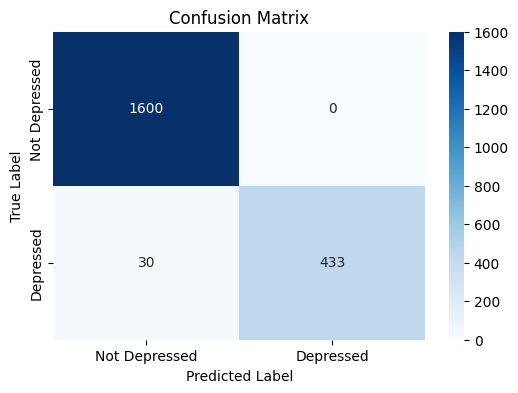

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Predict New Tweets


In [23]:
def predict_depression(tweet):
    # Clean the input tweet using the same function
    cleaned = clean_text(tweet)
    
    # Vectorize the cleaned tweet
    vec = vectorizer.transform([cleaned])
    
    # Predict using the trained model
    pred = model.predict(vec)[0]
    
    # Interpret result
    return "Depressed" if pred == 1 else "Not Depressed"

# 🔍 Example usage
sample_tweet = "I feel so down and tired all the time."
print("Prediction:", predict_depression(sample_tweet))


Prediction: Not Depressed


In [24]:
# Sample test tweets
sample_tweets = [
    "I feel like I can't go on anymore. Nothing makes sense.",
    "Life is beautiful. I'm so grateful for everything.",
    "I'm exhausted and everything hurts, but I smile anyway.",
    "Today was a really productive and happy day!",
    "I don't want to get out of bed. What's the point?",
    "Hanging out with friends was fun today!",
    "Everything feels so heavy. I want to be alone.",
    "I'm so excited about my new job opportunity!",
    "I feel empty and numb most of the time.",
    "Just got promoted at work and I’m feeling amazing!"
]

# Make predictions
for tweet in sample_tweets:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression(tweet))
    print("-" * 60)


Tweet: I feel like I can't go on anymore. Nothing makes sense.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Life is beautiful. I'm so grateful for everything.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I'm exhausted and everything hurts, but I smile anyway.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Today was a really productive and happy day!
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I don't want to get out of bed. What's the point?
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Hanging out with friends was fun today!
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels so heavy. I want to be alone.
Prediction: Not Depressed
----------------------------------------------------------

In [25]:
# Likely depressed tweets
depressed_samples = [
    "I feel like I'm drowning and no one can hear me.",
    "Everything feels pointless. I'm just so tired of pretending.",
    "No one understands how empty I feel inside.",
    "I wake up every day hoping it’s my last.",
    "I can't sleep, I can't eat, I just want the pain to stop.",
    "I’m surrounded by people but I’ve never felt more alone.",
    "It's like I'm invisible, like I don’t even exist.",
    "My heart hurts and I don’t know why anymore.",
    "I smile in front of everyone, but I’m falling apart inside.",
    "Some days I wish I could disappear completely."
]

# Make predictions
for tweet in depressed_samples:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression(tweet))
    print("-" * 60)


Tweet: I feel like I'm drowning and no one can hear me.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels pointless. I'm just so tired of pretending.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: No one understands how empty I feel inside.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I wake up every day hoping it’s my last.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I can't sleep, I can't eat, I just want the pain to stop.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I’m surrounded by people but I’ve never felt more alone.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: It's like I'm invisible, like I don’t even exist.
Prediction: Not Depressed
-------------------------------------------

Traing Random Forest (RF) model to see if it can predict better 

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# Predict using the Random Forest model
rf_pred = rf_model.predict(X_test_vec)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("📊 Accuracy:", accuracy_score(y_test, rf_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, rf_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


📊 Accuracy: 0.9941832283082889

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063


🔲 Confusion Matrix:
 [[1600    0]
 [  12  451]]


In [28]:
def predict_depression_rf(tweet):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    pred = rf_model.predict(vec)[0]
    return "Depressed" if pred == 1 else "Not Depressed"


In [29]:
# Re-run predictions on depressive tweets using Random Forest
for tweet in depressed_samples:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression_rf(tweet))
    print("-" * 60)


Tweet: I feel like I'm drowning and no one can hear me.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels pointless. I'm just so tired of pretending.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: No one understands how empty I feel inside.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I wake up every day hoping it’s my last.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I can't sleep, I can't eat, I just want the pain to stop.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I’m surrounded by people but I’ve never felt more alone.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: It's like I'm invisible, like I don’t even exist.
Prediction: Not Depressed
-------------------------------------------

Let's train SVM


In [30]:
from sklearn.svm import LinearSVC

# Initialize and train the SVM classifier
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [31]:
# Predict on test set
svm_pred = svm_model.predict(X_test_vec)

# Show performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("📊 Accuracy:", accuracy_score(y_test, svm_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, svm_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


📊 Accuracy: 0.9951526902569074

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063


🔲 Confusion Matrix:
 [[1600    0]
 [  10  453]]


In [32]:
def predict_depression_svm(tweet):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    pred = svm_model.predict(vec)[0]
    return "Depressed" if pred == 1 else "Not Depressed"


In [33]:
# Test same depressive tweets using the SVM model
for tweet in depressed_samples:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression_svm(tweet))
    print("-" * 60)


Tweet: I feel like I'm drowning and no one can hear me.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels pointless. I'm just so tired of pretending.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: No one understands how empty I feel inside.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I wake up every day hoping it’s my last.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I can't sleep, I can't eat, I just want the pain to stop.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I’m surrounded by people but I’ve never felt more alone.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: It's like I'm invisible, like I don’t even exist.
Prediction: Not Depressed
-------------------------------------------

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [35]:
df['clean_text'] = df['text'].apply(clean_text_advanced)


In [36]:
# Use the new clean_text column
X = df['clean_text']
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [38]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_pred = svm_model.predict(X_test_vec)

print("📊 Accuracy:", accuracy_score(y_test, svm_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, svm_pred))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


📊 Accuracy: 0.9941832283082889

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063


🔲 Confusion Matrix:
 [[1600    0]
 [  12  451]]


In [40]:
def predict_depression_svm(tweet):
    cleaned = clean_text_advanced(tweet)
    vec = vectorizer.transform([cleaned])
    pred = svm_model.predict(vec)[0]
    return "Depressed" if pred == 1 else "Not Depressed"


In [41]:
def predict_depression_svm(tweet):
    cleaned = clean_text_advanced(tweet)
    vec = vectorizer.transform([cleaned])
    pred = svm_model.predict(vec)[0]
    return "Depressed" if pred == 1 else "Not Depressed"


In [42]:
# Same list of depressive samples
depressed_samples = [
    "I feel like I'm drowning and no one can hear me.",
    "Everything feels pointless. I'm just so tired of pretending.",
    "No one understands how empty I feel inside.",
    "I wake up every day hoping it’s my last.",
    "I can't sleep, I can't eat, I just want the pain to stop.",
    "I’m surrounded by people but I’ve never felt more alone.",
    "It's like I'm invisible, like I don’t even exist.",
    "My heart hurts and I don’t know why anymore.",
    "I smile in front of everyone, but I’m falling apart inside.",
    "Some days I wish I could disappear completely."
]

# Run predictions again
for tweet in depressed_samples:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression_svm(tweet))
    print("-" * 60)


Tweet: I feel like I'm drowning and no one can hear me.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels pointless. I'm just so tired of pretending.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: No one understands how empty I feel inside.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I wake up every day hoping it’s my last.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I can't sleep, I can't eat, I just want the pain to stop.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I’m surrounded by people but I’ve never felt more alone.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: It's like I'm invisible, like I don’t even exist.
Prediction: Not Depressed
-------------------------------------------

In [43]:
from sklearn.svm import LinearSVC

# Automatically balance the classes
svm_model_balanced = LinearSVC(class_weight='balanced')
svm_model_balanced.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_pred_balanced = svm_model_balanced.predict(X_test_vec)

print("📊 Accuracy:", accuracy_score(y_test, svm_pred_balanced))
print("\n🧾 Classification Report:\n", classification_report(y_test, svm_pred_balanced))
print("\n🔲 Confusion Matrix:\n", confusion_matrix(y_test, svm_pred_balanced))


📊 Accuracy: 0.9946679592825982

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063


🔲 Confusion Matrix:
 [[1598    2]
 [   9  454]]


In [45]:
def predict_depression_balanced(tweet):
    cleaned = clean_text_advanced(tweet)
    vec = vectorizer.transform([cleaned])
    pred = svm_model_balanced.predict(vec)[0]
    return "Depressed" if pred == 1 else "Not Depressed"


In [46]:
for tweet in depressed_samples:
    print(f"Tweet: {tweet}")
    print("Prediction:", predict_depression_balanced(tweet))
    print("-" * 60)


Tweet: I feel like I'm drowning and no one can hear me.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: Everything feels pointless. I'm just so tired of pretending.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: No one understands how empty I feel inside.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I wake up every day hoping it’s my last.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I can't sleep, I can't eat, I just want the pain to stop.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: I’m surrounded by people but I’ve never felt more alone.
Prediction: Not Depressed
------------------------------------------------------------
Tweet: It's like I'm invisible, like I don’t even exist.
Prediction: Not Depressed
-------------------------------------------

Model Performance Visualization 

c:\Users\HP\Documents\GitHub\Agentic-AI-Day-1\Agentic-AI-Day-1-1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128306 (\N{BLACK SQUARE BUTTON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


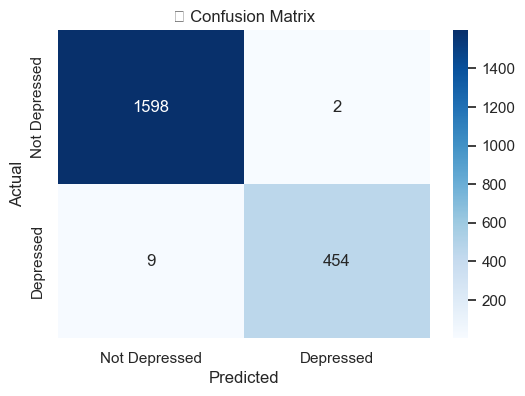

C:\Users\HP\AppData\Local\Temp\ipykernel_17156\1517190030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Not Depressed", "Depressed"], y=counts, palette="Set2")
c:\Users\HP\Documents\GitHub\Agentic-AI-Day-1\Agentic-AI-Day-1-1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


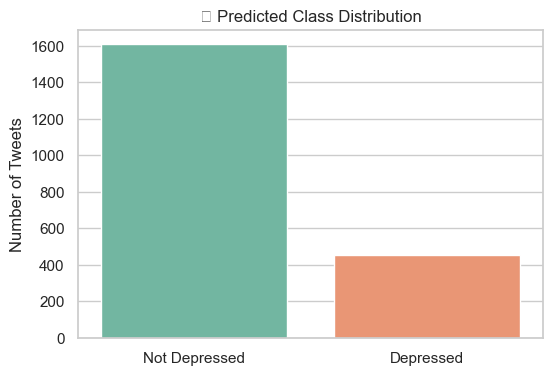

c:\Users\HP\Documents\GitHub\Agentic-AI-Day-1\Agentic-AI-Day-1-1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


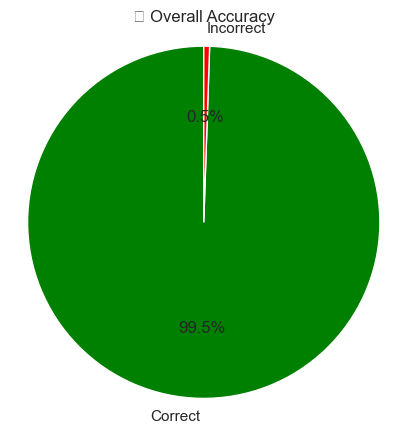

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 📌 Set style
sns.set(style="whitegrid")

# 1. 📉 Plot Confusion Matrix (with seaborn heatmap)
conf_matrix = confusion_matrix(y_test, svm_pred_balanced)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.title("🔲 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. 📊 Bar Graph of Prediction Counts
import numpy as np

# Count predictions for each class
unique, counts = np.unique(svm_pred_balanced, return_counts=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=["Not Depressed", "Depressed"], y=counts, palette="Set2")
plt.title("📊 Predicted Class Distribution")
plt.ylabel("Number of Tweets")
plt.show()

# 3. 🎯 Accuracy Pie Chart
accuracy = accuracy_score(y_test, svm_pred_balanced)
plt.figure(figsize=(5, 5))
plt.pie([accuracy, 1 - accuracy], labels=["Correct", "Incorrect"], autopct='%1.1f%%', colors=["green", "red"], startangle=90)
plt.title("✅ Overall Accuracy")
plt.axis("equal")
plt.show()
